In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
raw_data = pd.read_csv('./datasets/diamondgames.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [138]:
raw_data.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [139]:
blue_wins = raw_data[raw_data['blueWins'] == 1]
blue_wins = blue_wins.sort_values(['gameId']).reset_index()
blue_wins.drop(columns='index', inplace=True)
blue_wins.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4295358071,1,17,6,0,10,6,13,0,0,...,0,16484,7.0,17884,211,59,-1864,797,21.1,1648.4
1,4296004784,1,19,5,1,6,2,6,1,1,...,0,14410,6.4,16517,232,44,-2944,-3092,23.2,1441.0
2,4297209068,1,17,5,1,6,6,6,0,0,...,0,16339,6.8,16934,216,53,-282,-399,21.6,1633.9
3,4298114879,1,21,2,0,6,2,8,0,0,...,0,15370,7.0,17625,250,60,-1448,664,25.0,1537.0
4,4298181346,1,18,7,1,8,6,8,1,1,...,0,16719,6.6,17422,220,44,-786,-1888,22.0,1671.9


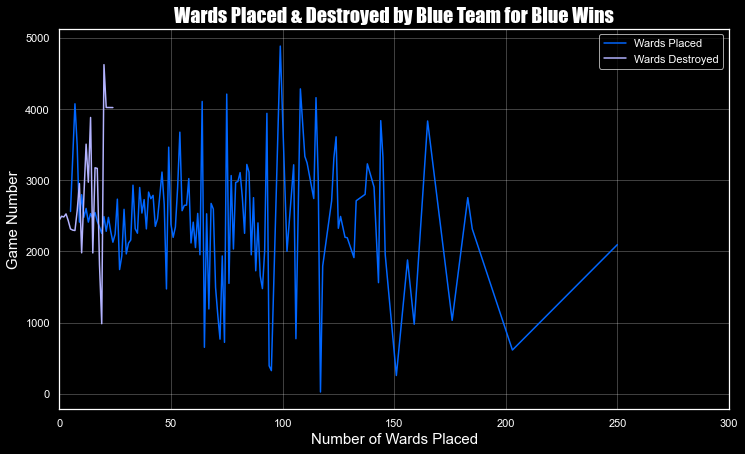

In [140]:
font1 = {'family':'fantasy','color':'white','size':20}
font2 = {'family':'sans-serif','color':'white','size':15}

plt.style.use("dark_background")
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})

fig= plt.subplots(figsize=(12,7))
fig = sns.lineplot(x = blue_wins['blueWardsPlaced'], y = blue_wins.index, color='#0066ff', errorbar=None)
fig = sns.lineplot(x = blue_wins['blueWardsDestroyed'], y = blue_wins.index, color='#b3b3ff',errorbar=None)

plt.title('Wards Placed & Destroyed by Blue Team for Blue Wins', fontdict=font1)
plt.ylabel('Game Number', fontdict=font2)
plt.xlabel('Number of Wards Placed', fontdict=font2)
plt.xlim(0, 300)
plt.legend(['Wards Placed', 'Wards Destroyed'])

In [141]:
red_wins = raw_data[raw_data['blueWins'] != 1]
red_wins = red_wins.sort_values(['gameId']).reset_index()
red_wins.drop(columns='index', inplace=True)
red_wins.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4296036692,0,15,5,1,9,7,10,1,1,...,0,16763,6.8,18066,252,45,-339,-261,25.2,1676.3
1,4296354535,0,16,5,1,12,3,14,1,1,...,0,14843,6.6,16600,207,52,-4188,-2399,20.7,1484.3
2,4297422468,0,18,2,0,4,6,0,0,0,...,0,17540,7.2,18607,247,56,2713,1237,24.7,1754.0
3,4378558412,0,16,3,0,8,11,9,0,0,...,0,18238,7.2,18356,190,52,1867,2002,19.0,1823.8
4,4379661286,0,16,1,0,5,9,3,1,1,...,0,18115,6.6,17245,252,49,3014,357,25.2,1811.5


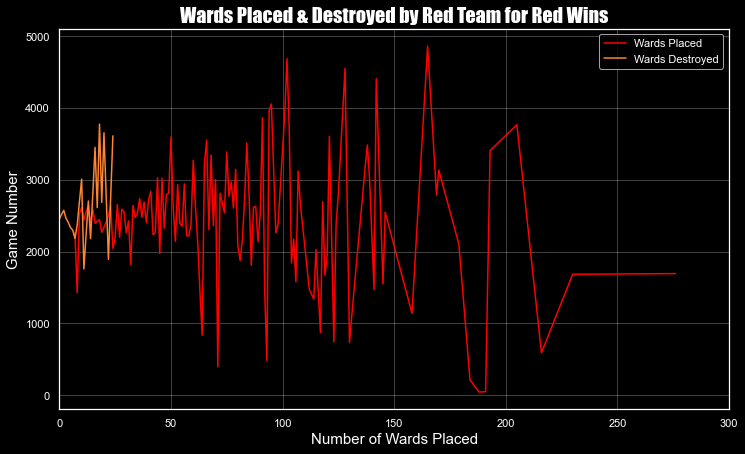

In [142]:
fig, ax = plt.subplots(figsize=(12,7))
fig = sns.lineplot(x = red_wins['redWardsPlaced'], y = red_wins.index, color='#ff0000', errorbar=None)
fig = sns.lineplot(x = red_wins['redWardsDestroyed'], y = red_wins.index, color='#ff8533',errorbar=None)

plt.title('Wards Placed & Destroyed by Red Team for Red Wins', fontdict=font1)
plt.ylabel('Game Number', fontdict=font2)
plt.xlabel('Number of Wards Placed', fontdict=font2)
plt.xlim(0, 300)
plt.legend(['Wards Placed', 'Wards Destroyed'])

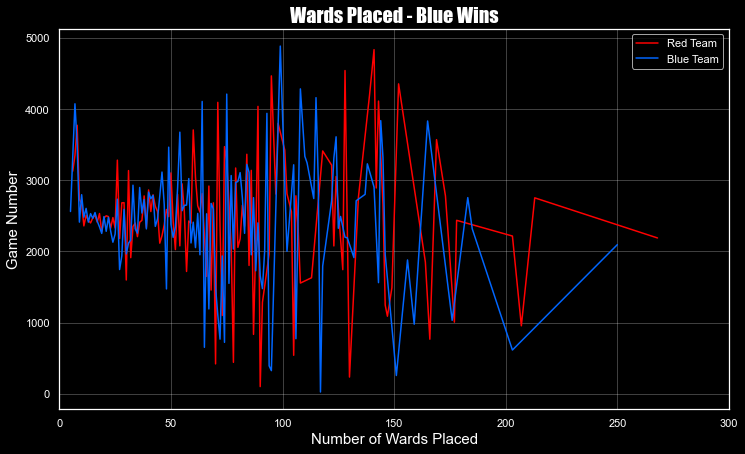

In [143]:
fig= plt.subplots(figsize=(12,7))
fig = sns.lineplot(x = blue_wins['redWardsPlaced'], y = blue_wins.index, color='#ff0000', errorbar=None)
fig = sns.lineplot(x = blue_wins['blueWardsPlaced'], y = blue_wins.index, color='#0066ff',errorbar=None)

plt.title('Wards Placed - Blue Wins', fontdict=font1)
plt.ylabel('Game Number', fontdict=font2)
plt.xlabel('Number of Wards Placed', fontdict=font2)
plt.xlim(0, 300)
plt.legend(['Red Team', 'Blue Team'])

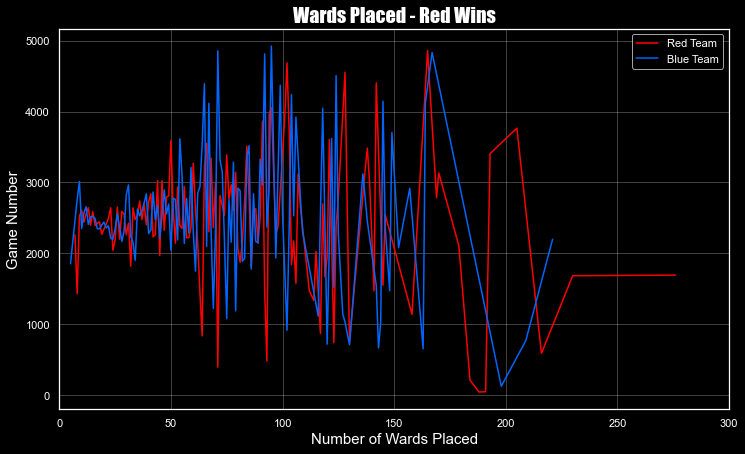

In [144]:
fig = plt.subplots(figsize=(12,7))
fig = sns.lineplot(x = red_wins['redWardsPlaced'], y = red_wins.index, color='#ff0000', errorbar=None)
fig = sns.lineplot(x = red_wins['blueWardsPlaced'], y = red_wins.index, color='#0066ff',errorbar=None)

plt.title('Wards Placed - Red Wins', fontdict=font1)
plt.ylabel('Game Number', fontdict=font2)
plt.xlabel('Number of Wards Placed', fontdict=font2)
plt.xlim(0, 300)
plt.legend(['Red Team', 'Blue Team'])

<Figure size 432x288 with 0 Axes>

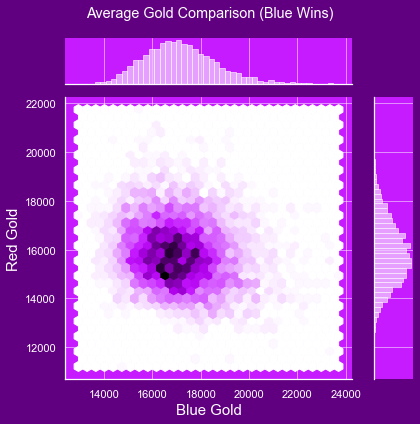

In [145]:
fig = plt.figure()

joint_kws = dict(gridsize=30)
sns.set(rc = {'axes.facecolor':'#c61aff', 'figure.facecolor':'#600080','xtick.color': 'white', 'ytick.color': 'white', 'text.color': 'white'})
fig = sns.jointplot(x = 'blueTotalGold', y = 'redTotalGold', data = blue_wins, kind = "hex", color="#f2ccff", joint_kws = joint_kws)
plt.ylabel('Red Gold', fontdict=font2)
plt.xlabel('Blue Gold', fontdict=font2)
plt.suptitle("Average Gold Comparison (Blue Wins)")
plt.tight_layout()
plt.show()


In [146]:
blue_wins.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4295358071,1,17,6,0,10,6,13,0,0,...,0,16484,7.0,17884,211,59,-1864,797,21.1,1648.4
1,4296004784,1,19,5,1,6,2,6,1,1,...,0,14410,6.4,16517,232,44,-2944,-3092,23.2,1441.0
2,4297209068,1,17,5,1,6,6,6,0,0,...,0,16339,6.8,16934,216,53,-282,-399,21.6,1633.9
3,4298114879,1,21,2,0,6,2,8,0,0,...,0,15370,7.0,17625,250,60,-1448,664,25.0,1537.0
4,4298181346,1,18,7,1,8,6,8,1,1,...,0,16719,6.6,17422,220,44,-786,-1888,22.0,1671.9


[Text(0.5, 0, 'blueWardsPlaced'),
 Text(1.5, 0, 'blueWardsDestroyed'),
 Text(2.5, 0, 'blueKills'),
 Text(3.5, 0, 'blueDeaths'),
 Text(4.5, 0, 'blueAssists'),
 Text(5.5, 0, 'blueTotalGold'),
 Text(6.5, 0, 'blueAvgLevel'),
 Text(7.5, 0, 'blueTotalExperience'),
 Text(8.5, 0, 'blueTotalMinionsKilled'),
 Text(9.5, 0, 'blueTotalJungleMinionsKilled'),
 Text(10.5, 0, 'redWardsPlaced'),
 Text(11.5, 0, 'redWardsDestroyed'),
 Text(12.5, 0, 'redKills'),
 Text(13.5, 0, 'redDeaths'),
 Text(14.5, 0, 'redAssists'),
 Text(15.5, 0, 'redTotalGold'),
 Text(16.5, 0, 'redAvgLevel'),
 Text(17.5, 0, 'redTotalExperience'),
 Text(18.5, 0, 'redTotalMinionsKilled'),
 Text(19.5, 0, 'redTotalJungleMinionsKilled')]

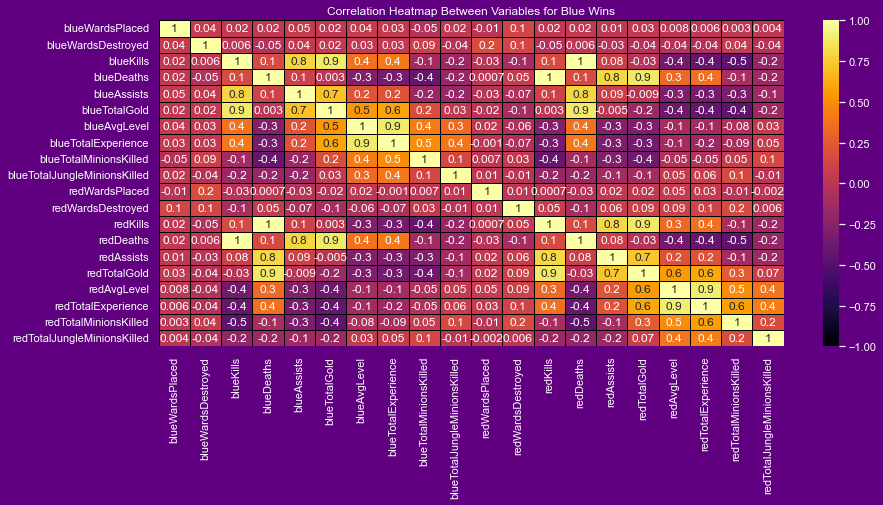

In [163]:
corr_df_blue = blue_wins.drop(['gameId','blueWins','blueFirstBlood','blueEliteMonsters','blueDragons','blueTowersDestroyed','blueHeralds','blueGoldDiff','blueExperienceDiff','redGoldDiff','redExperienceDiff'], axis = 1)
corr_df_blue.drop(['redDragons','redHeralds'], axis = 1, inplace = True)
corr_df_blue.drop(['redFirstBlood'], axis = 1, inplace = True)
corr_df_blue.drop(['redEliteMonsters','redTowersDestroyed','blueGoldPerMin','redGoldPerMin','blueCSPerMin','redCSPerMin'], axis = 1, inplace = True)
corr_df_blue = corr_df_blue.corr(method='pearson')

plt.figure(figsize=(14, 6))
heatmap = sns.heatmap(corr_df_blue, annot=True, fmt='.1g', vmin= -1, vmax= 1, center= 0, cmap= 'inferno', linewidths=1, linecolor='black')
heatmap.set_title('Correlation Heatmap Between Variables for Blue Wins')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
